<a href="https://colab.research.google.com/github/EricStimpsonWSU/ModernLab/blob/main/ChaoticPendulum/notebooks/LowDampPoincare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/EricStimpsonWSU/ModernLab/main/ChaoticPendulum/data/chaotic_motion_lowdamp.csv"
raw = pd.read_csv(url)

In [ ]:
raw[raw["State Run #11"] == 1.0]

,Date and Time Run #11,Time (s) Run #11,Counts/sample (counts/sample) Run #11,Angle (rad) Run #11,Angular Velocity (rad/s) Run #11,Angular Acceleration (rad/s²) Run #11,Position (m) Run #11,Velocity (m/s) Run #11,Acceleration (m/s²) Run #11,Counts Run #11,State Run #11,Time in Gate (s) Run #11,Speed (m/s) Run #11
25,01/27/2023 03:04:45 pm,1.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
52,01/27/2023 03:04:46 pm,2.475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
79,01/27/2023 03:04:47 pm,3.743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
107,01/27/2023 03:04:49 pm,5.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
134,01/27/2023 03:04:50 pm,6.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38727,01/27/2023 03:34:41 pm,1797.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
38754,01/27/2023 03:34:42 pm,1798.499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
38782,01/27/2023 03:34:43 pm,1799.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
38810,01/27/2023 03:34:45 pm,1801.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
exp = raw.iloc[16:].rename(columns={"Time (s) Run #11": "Time", "Angle (rad) Run #11": "Theta", "Angular Velocity (rad/s) Run #11": "Omega", "Angular Acceleration (rad/s²) Run #11": "OmegaDot", "State Run #11": "State"}).filter(items=["Time", "Theta", "Omega", "OmegaDot", "State"])
exp["Phi"] = 0.0
exp["PoincareSet"]= 0



In [ ]:
gateTriggers = exp[exp["State"] == 1.0].shape[0]
minTime = exp[exp["State"] == 1.0].Time.min()
maxTime = exp[exp["State"] == 1.0].Time.max()
elapsedTime = maxTime - minTime
avgTime = elapsedTime/(gateTriggers - 1)
phiDot = 2. * np.pi / avgTime
[gateTriggers, minTime, maxTime, elapsedTime, avgTime, phiDot]

[1398,
 1.214,
 1802.362,
 1801.1480000000001,
 1.289297065139585,
 4.873341820955236]

In [ ]:
cycleStartTime = 0
poincareSet = 0
for row in exp.itertuples():
  if row.State == 1:
    cycleStartTime = row.Time
    poincareSet = 0
  elapsedTime = row.Time - cycleStartTime
  exp.at[row.Index, "Phi"] = phiDot * elapsedTime
  exp.at[row.Index, "PoincareSet"] = poincareSet
  poincareSet += 1


In [ ]:
exp

,Time,Theta,Omega,OmegaDot,State,Phi,PoincareSet
16,0.80,3.787,5.818,3.297,NaN,3.898673,0
17,0.85,4.084,6.050,2.327,NaN,4.142341,1
18,0.90,4.398,6.167,-1.357,NaN,4.386008,2
19,0.95,4.712,5.992,-7.369,NaN,4.629675,3
20,1.00,5.009,5.469,-14.544,NaN,4.873342,4
...,...,...,...,...,...,...,...
38846,1802.70,4.433,6.050,16.290,NaN,1.647190,8
38847,1802.75,4.765,6.807,9.890,NaN,1.890857,9
38848,1802.80,5.131,7.098,NaN,NaN,2.134524,10
38849,1802.85,5.498,6.981,NaN,NaN,2.378191,11


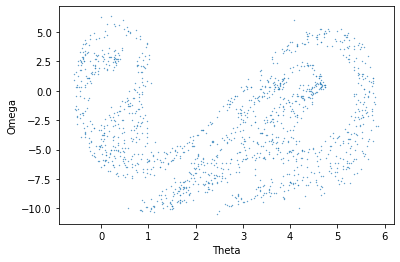

In [ ]:
exp[exp.PoincareSet==1].plot(kind="scatter", x="Theta", y="Omega", s=0.1)

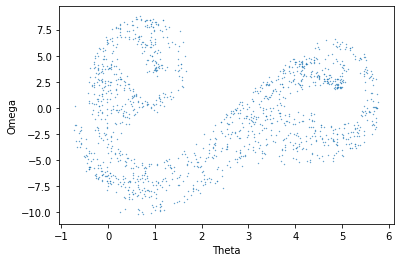

In [ ]:
exp[exp.PoincareSet==6].plot(kind="scatter", x="Theta", y="Omega", s=0.1)

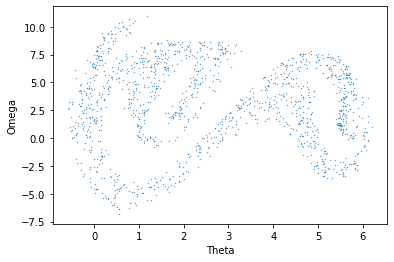

In [ ]:
exp[exp.PoincareSet==11].plot(kind="scatter", x="Theta", y="Omega", s=0.1)

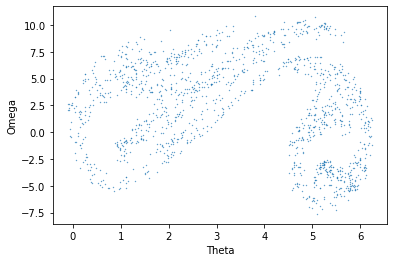

In [ ]:
exp[exp.PoincareSet==16].plot(kind="scatter", x="Theta", y="Omega", s=0.1)

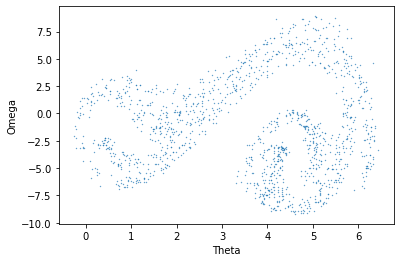

In [ ]:
exp[exp.PoincareSet==21].plot(kind="scatter", x="Theta", y="Omega", s=0.1)